**【問題1】データの取得**  
以下のドキュメントを参考にしながら、irisデータセット読み込みましょう。  
sklearn.datasets.load_iris — scikit-learn 0.20.2 documentation  
データが読み込めたら、説明変数を下のようなPandasのDataFrame型変数Xに格納してください。列の名前も以下を参考にしてください。  
pandas.DataFrame — pandas 0.24.2 documentation  
目的変数も同様にyに格納してください。

In [1]:
import pandas as pd
from sklearn import datasets
iris = datasets.load_iris()
X = pd.DataFrame(iris.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
y = pd.DataFrame(iris.target, columns=['Species'])

**【問題2】データの結合**  
問題1で準備したX,yを結合させたDataFrame型変数dfを作成してください。結合することで扱いやすくなります。これ以降はこのdfを使っていきます。

In [2]:
df = pd.concat([X, y], axis=1, sort=False)
df

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


**【問題3】データの確認**  
今回扱うデータがどのようなものなのかを確認します。以下の4つを行ってください。  
- 先頭から4番目までのサンプルを表示させ、各特徴量がどういったものかを見る。（数値データか文字データかなど）
- ラベルごとのサンプル数の合計を出力する。
- 特徴量に欠損値があるかを確認する。
- 特徴量の平均値と標準偏差、四分位数を一度に表示させる。

In [3]:
# 先頭から4番目までのサンプルを表示させる
df.head()

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


各特徴量('sepal_length', 'sepal_width', 'petal_length', 'petal_width')は数値データとなっている

In [4]:
# ラベルごとのサンプル数の合計を出力する
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   Species       150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [5]:
# 各ラベルの欠測値をカウント
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
Species         0
dtype: int64

In [6]:
# 特徴量の平均値と標準偏差、四分位数を一度に表示させる
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


**【問題4】irisデータセット自体の調査**  
ページのはじめで「カナダのガスペ半島のある牧草地で」と書きましたが、データセット自体についてもう少し調査しておきましょう。データセットを見る上で、そのデータセット自体について知っておくことも大切です。

**irisデータセットについて**
- イギリスの統計学・植物学者であるRonald Fisherにより1963年に書かれた論文"The use of multiple measurements in taxonomic problems"中で線形判別分析(LDA)の例として使用された多変量変数データセット
- 3種のアイリスの花の形態多様性を定量化するためにEdgar Andersonによって集められたため、しばしばAndersonのデータセットとも呼ばれる
- 3種の内、2種のデータはガスペ半島で集められた
- データセットはアイリス3種それぞれ50サンプルずつから成り、それぞれのサンプルから4つの特徴量(がく片/花びらの長さと幅)が測定されている　　
参照サイト：https://en.wikipedia.org/wiki/Iris_flower_data_set

**【問題5】必要なデータを抽出**  
DataFrameから必要なデータを抽出する方法を確認していきます。以下を行ってください。  
- sepal_widthの列を３つの異なる方法で抽出する
- 50番目から99番目までのデータを抽出する
- petal_lengthの列の50番目から99番目までのデータを抽出する
- petal_widthの値が0.2のデータを抽出する  
.locや.ilocを使うことになります。この２つはどう違うのかについて説明してください。

In [7]:
# sepal_widthの列を3つの異なる方法で抽出
# 1. column名で抽出(以下2つは同じ動作)
df['sepal_width']
df.sepal_width

# 2.locアトリビュートを使用
df.loc[:, 'sepal_width']

# 3.ilocアトリビュートを使用
df.iloc[:, 1]

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal_width, Length: 150, dtype: float64

** .locと.ilocの違い**  
- .locは、loc[インデックスラベル, カラムラベル]の様にラベル名を指定する
- .ilocは、iloc[行数, 列数]のように行数、列数を指定する

In [8]:
# 50番目から99番目までのデータを抽出する
df[50:100]

,sepal_length,sepal_width,petal_length,petal_width,Species
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1
55,5.7,2.8,4.5,1.3,1
56,6.3,3.3,4.7,1.6,1
57,4.9,2.4,3.3,1.0,1
58,6.6,2.9,4.6,1.3,1
59,5.2,2.7,3.9,1.4,1


In [9]:
# petal_lengthの列の50番目から99番目までのデータを抽出する
df.loc[50:100, 'petal_length']

50     4.7
51     4.5
52     4.9
53     4.0
54     4.6
55     4.5
56     4.7
57     3.3
58     4.6
59     3.9
60     3.5
61     4.2
62     4.0
63     4.7
64     3.6
65     4.4
66     4.5
67     4.1
68     4.5
69     3.9
70     4.8
71     4.0
72     4.9
73     4.7
74     4.3
75     4.4
76     4.8
77     5.0
78     4.5
79     3.5
80     3.8
81     3.7
82     3.9
83     5.1
84     4.5
85     4.5
86     4.7
87     4.4
88     4.1
89     4.0
90     4.4
91     4.6
92     4.0
93     3.3
94     4.2
95     4.2
96     4.2
97     4.3
98     3.0
99     4.1
100    6.0
Name: petal_length, dtype: float64

In [10]:
# petal_widthの値が0.2のデータを抽出する  
df.loc[df['petal_width'] == 0.2]

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
10,5.4,3.7,1.5,0.2,0
11,4.8,3.4,1.6,0.2,0
14,5.8,4.0,1.2,0.2,0


**【問題6】図の作成**  
データは可視化して確認することが大切です。次の3つを行ってください。作図のライブラリはMatplotlibの他seabornもよく使われます。
- ラベルごとのサンプル数を円グラフにする（パーセンテージまで表示する）
- 特徴量を一つずつ選び、箱ひげ図を使ってラベルごとのデータの分布を可視化する
- 特徴量を一つずつ選び、バイオリン図を使ってラベルごとのデータの分布を可視化する  
箱ひげ図とバイオリン図は似た図を表示します。これらはどう違い、それぞれどのような利点があるのかについて説明してください。

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

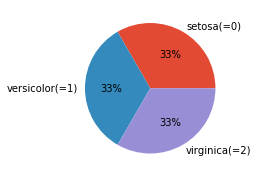

In [12]:
plt.style.use('ggplot')

labels = ['setosa(=0)', 'versicolor(=1)', 'virginica(=2)']
sizes = [len(df.loc[df['Species'] == 0]), len(df.loc[df['Species'] == 1]), len(df.loc[df['Species'] == 2])]
fig = plt.figure(figsize=(3, 3))
ax = fig.add_subplot(111)

ax.pie(sizes, labels=labels, autopct='%1.0f%%')
plt.show()

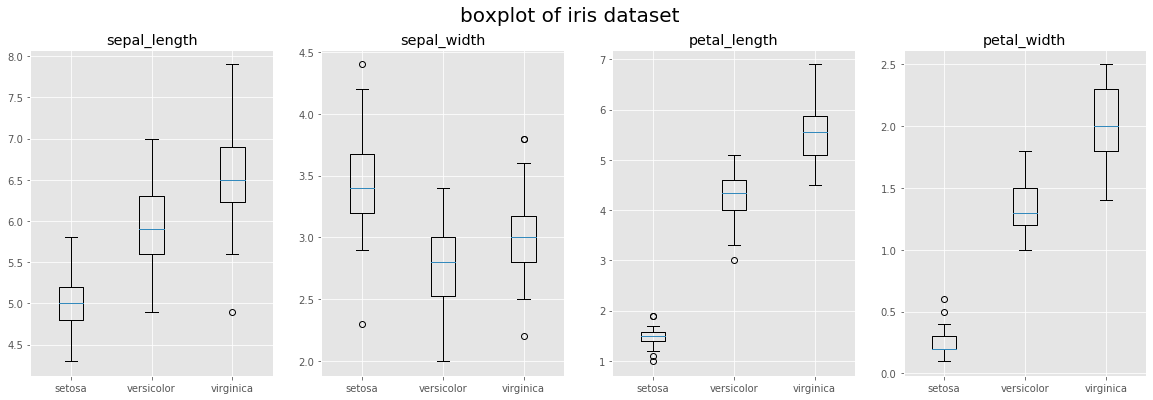

In [13]:
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
# クラスラベルとしては'Species'列のクラスラベルとして'0=setosa', '1=versicolor', '2=virginica'となる
species = ['setosa', 'versicolor', 'virginica']
fig = plt.figure(figsize=(20, 6))
fig.suptitle('boxplot of iris dataset', fontsize=20)

for i, feature in enumerate(features, 1):
    x = []
    for ii in [0, 1, 2]:
        trg_species = df.loc[df['Species']==ii]
        x.append(list(trg_species[feature]))
    ax = fig.add_subplot(1, 4, i)
    ax.boxplot(x)
    ax.set_xticks([1, 2, 3])
    ax.set_xticklabels(species)
    ax.set_title(feature)

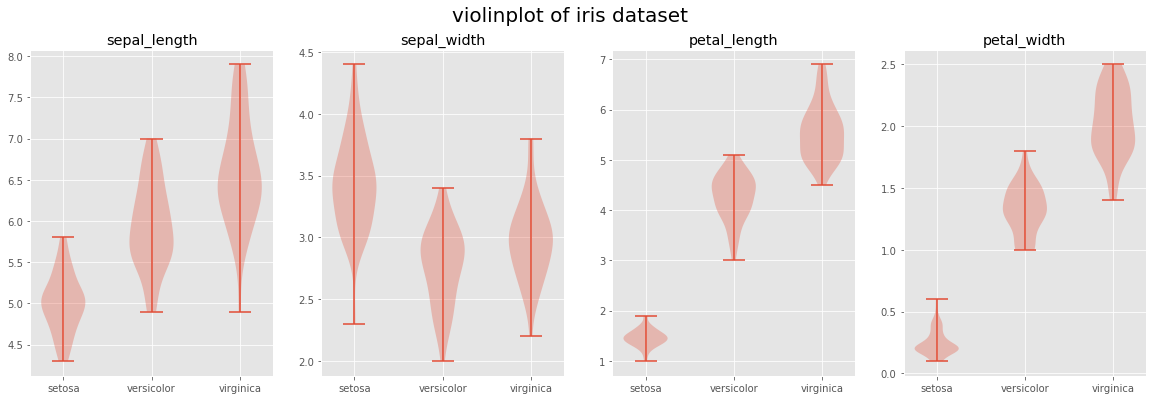

In [14]:
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
# クラスラベルとしては'Species'列のクラスラベルとして'0=setosa', '1=versicolor', '2=virginica'となる
species = ['setosa', 'versicolor', 'virginica']
fig = plt.figure(figsize=(20, 6))
fig.suptitle('violinplot of iris dataset', fontsize=20)

for i, feature in enumerate(features, 1):
    x = []
    for ii in [0, 1, 2]:
        trg_species = df.loc[df['Species']==ii]
        x.append(list(trg_species[feature]))
    ax = fig.add_subplot(1, 4, i)
    ax.violinplot(x)
    ax.set_xticks([1, 2, 3])
    ax.set_xticklabels(species)
    ax.set_title(feature)

**箱ひげ図とバイオリン図それぞれの特徴**  
- 箱ひげ図  
データの四分位点、中央値、最大値、最小値を記載するのでデータの分布が一覧できる。  
二峰性や一様分布などの特徴は可視化できない。

- バイオリン図
各データの分布が図にそのまま表れる。  
データ分布はカーネル密度推定プロットによって滑らかに描画されるため、実際にはデータが存在しない範囲にもあたかもデータが存在しているかのように見えることがある。

**【問題7】特徴量間の関係の確認**
特徴量間の関係を見ていきます。次の4つを行ってください。
- 縦軸と横軸に特徴量を１つずつ取り、種類毎に色分けした散布図を作る
- 全ての組み合わせの散布図を一度に表示させる、散布図行列を作る
- ４つの特徴量に関する相関係数行列を作る
- 相関係数行列のヒートマップを作る  
相関係数行列はDataFrameのcorr()メソッドを使うことで求められます。

C:\Users\ajbad\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()
C:\Users\ajbad\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\Users\ajbad\Anaconda3\lib\site-packages\ipykernel_launcher.py:52: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the

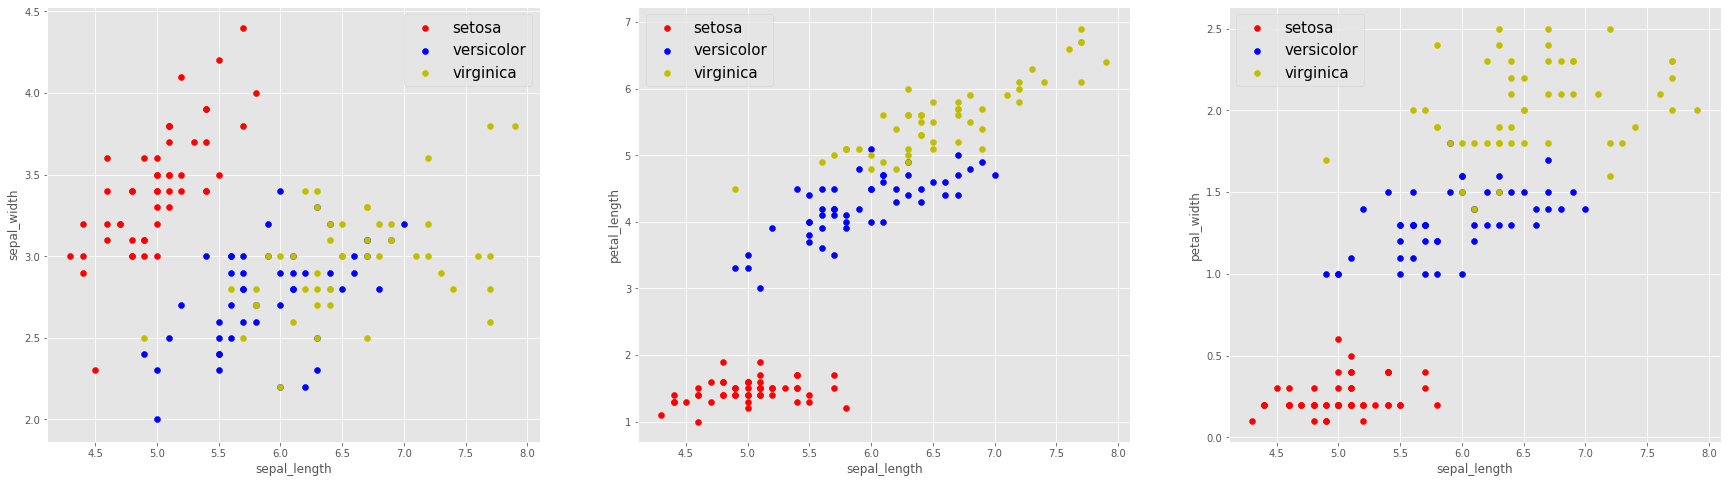

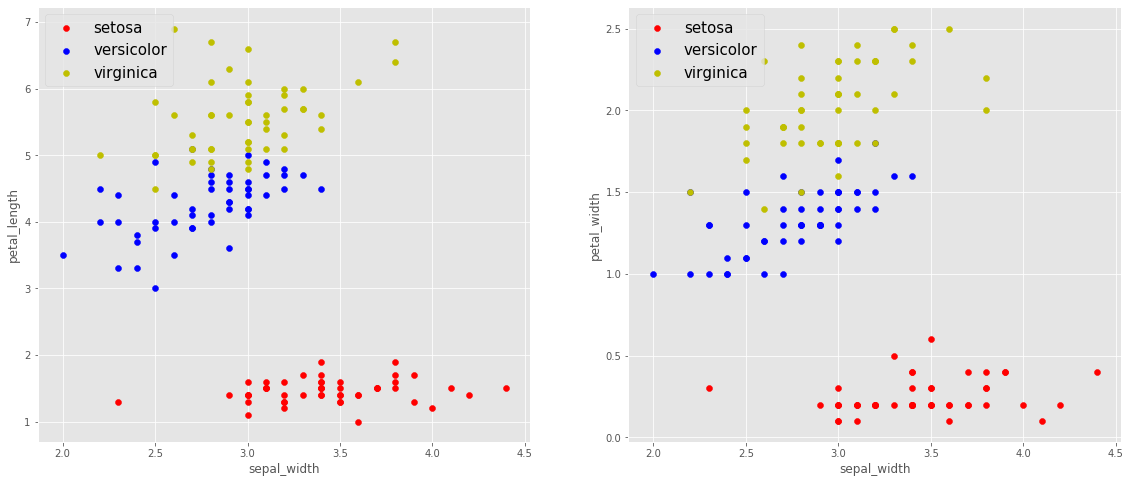

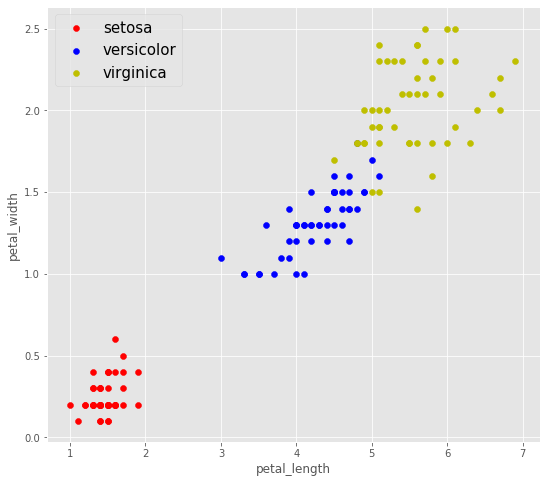

In [15]:
# 縦軸と横軸に特徴量を１つずつ取り、種類毎に色分けした散布図を作る

# クラスラベルとしては'Species'列のクラスラベルとして'0=setosa', '1=versicolor', '2=virginica'となる
# 横軸:'sepal_length', 縦軸:'sepal_width', 'petal_length', 'petal_width'
species = ['setosa', 'versicolor', 'virginica']
x_feature = 'sepal_length'
y_features = ['sepal_width', 'petal_length', 'petal_width']
colors = ['r', 'b', 'y']

fig = plt.figure(figsize=(30, 8))

for i, y_feature in enumerate(y_features, 1):
    for ii, color in zip([0, 1, 2], colors):
        trg_species = df.loc[df['Species']==ii]
        y = trg_species[y_feature]
        ax = fig.add_subplot(1, 3, i)
        ax.scatter(trg_species[x_feature], y, c=color, label=species[ii])
    ax.set_xlabel(x_feature)
    ax.set_ylabel(y_feature)
    ax.legend(fontsize=15)

# 横軸:'sepal_width', 縦軸:'petal_length', 'petal_width'
species = ['setosa', 'versicolor', 'virginica']
x_feature = 'sepal_width'
y_features = ['petal_length', 'petal_width']
colors = ['r', 'b', 'y']

fig = plt.figure(figsize=(30, 8))

for i, y_feature in enumerate(y_features, 1):
    for ii, color in zip([0, 1, 2], colors):
        trg_species = df.loc[df['Species']==ii]
        y = trg_species[y_feature]
        ax = fig.add_subplot(1, 3, i)
        ax.scatter(trg_species[x_feature], y, c=color, label=species[ii])
    ax.set_xlabel(x_feature)
    ax.set_ylabel(y_feature)
    ax.legend(fontsize=15)

# 横軸:'petal_length', 縦軸:'petal_width'
species = ['setosa', 'versicolor', 'virginica']
x_feature = 'petal_length'
y_features = ['petal_width']
colors = ['r', 'b', 'y']

fig = plt.figure(figsize=(30, 8))

for i, y_feature in enumerate(y_features, 1):
    for ii, color in zip([0, 1, 2], colors):
        trg_species = df.loc[df['Species']==ii]
        y = trg_species[y_feature]
        ax = fig.add_subplot(1, 3, i)
        ax.scatter(trg_species[x_feature], y, c=color, label=species[ii])
    ax.set_xlabel(x_feature)
    ax.set_ylabel(y_feature)
    ax.legend(fontsize=15)

In [16]:
mapping = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
df_new = df
df_new['Species'] = df_new['Species'].map(mapping)
df_new

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


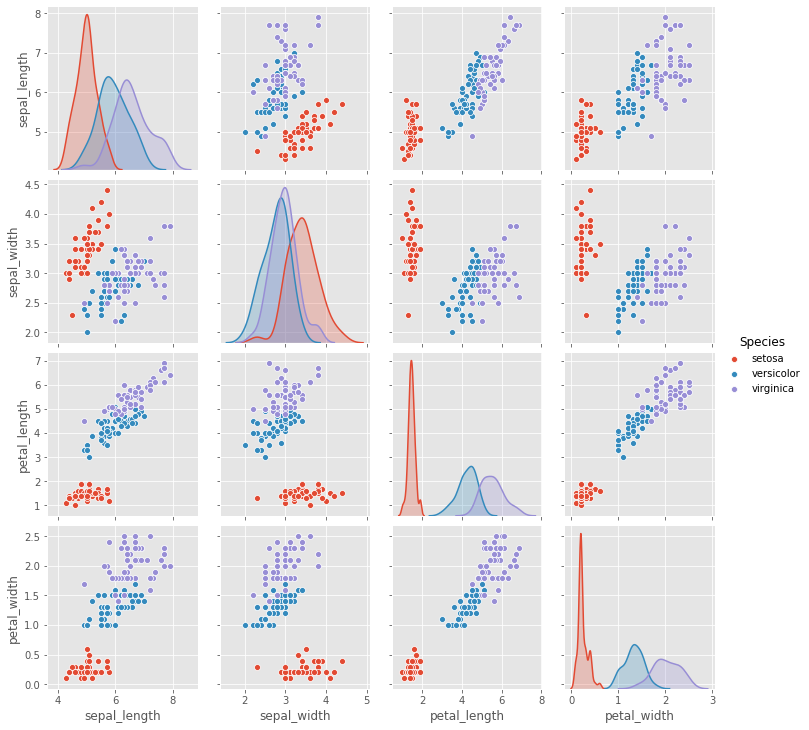

In [17]:
# 全ての組み合わせの散布図を一度に表示させる、散布図行列を作る
import seaborn as sns
sns.pairplot(df_new, hue='Species')
plt.show()

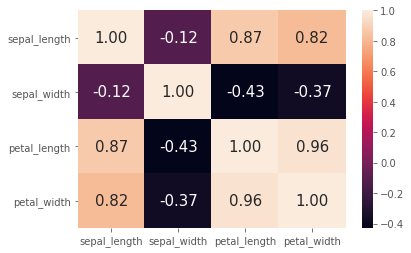

In [18]:
# ４つの特徴量に関する相関係数行列を作る
# 相関係数行列のヒートマップを作る  
import numpy as np
cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
cm = np.corrcoef(df[cols].values.T)
hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 fmt='.2f',
                 annot_kws={'size':15},
                 yticklabels=cols,
                 xticklabels=cols)
plt.show()

**【問題8】可視化したグラフや表の結果の説明**  
データを探索した時には、結果を述べる（+考察する）ことが大切です。ここまでで作成した表や図から読み取れることや気づきを説明してください。  
例えば、散布図行列を見ながら、3種類のアヤメにはどのような違いがあるかを説明してください。

上図の相関係数行列のヒートマップより、
petal_lengthとpetal_widthに関しては相関関係が高い。  
また、sepal_widthに関しては他のどの特徴量とも相関関係が低い。